## Prepare

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
summary_data = pd.read_csv('Recommenders_Results_Summary.csv')
summary_data

,Metric,Algo,Score
0,Collaborative Diversity,ALS,0.880526
1,Content Diversity,ALS,0.871292
2,Precision@k,ALS,0.053287
3,Recall@k,ALS,0.038843
4,Collaborative Diversity,SVD,0.722865
5,Content Diversity,SVD,0.869231
6,Precision@k,SVD,0.205101
7,Recall@k,SVD,0.081707
8,Collaborative Diversity,NCF,0.674940
9,Content Diversity,NCF,0.845880


In [7]:
summary_data = summary_data.replace('Collaborative Diversity','Co-Occurence Diversity')
summary_data = summary_data.replace('Content Diversity','Item-Feature Diversity')

summary_data

,Metric,Algo,Score
0,Co-Occurence Diversity,ALS,0.880526
1,Item-Feature Diversity,ALS,0.871292
2,Precision@k,ALS,0.053287
3,Recall@k,ALS,0.038843
4,Co-Occurence Diversity,SVD,0.722865
5,Item-Feature Diversity,SVD,0.869231
6,Precision@k,SVD,0.205101
7,Recall@k,SVD,0.081707
8,Co-Occurence Diversity,NCF,0.674940
9,Item-Feature Diversity,NCF,0.845880


In [14]:
summary_data_wider = summary_data.pivot(index ='Algo', columns ='Metric', values='Score')
summary_data_wider

Metric,Co-Occurence Diversity,Item-Feature Diversity,Precision@k,Recall@k
Algo,,,,
ALS,0.880526,0.871292,0.053287,0.038843
Light GCN,0.673293,0.845239,0.314790,0.315939
NCF,0.674940,0.845880,0.328959,0.341700
RBM,0.958215,0.879836,0.256840,0.296584
SAR,0.571075,0.858798,0.247826,0.253035
SVD,0.722865,0.869231,0.205101,0.081707
WD,0.717454,0.883584,0.083828,0.060314


In [17]:
summary_data_wider = summary_data_wider.sort_values(by = 'Co-Occurence Diversity')
summary_data_wider

Metric,Co-Occurence Diversity,Item-Feature Diversity,Precision@k,Recall@k
Algo,,,,
SAR,0.571075,0.858798,0.247826,0.253035
Light GCN,0.673293,0.845239,0.314790,0.315939
NCF,0.674940,0.845880,0.328959,0.341700
WD,0.717454,0.883584,0.083828,0.060314
SVD,0.722865,0.869231,0.205101,0.081707
ALS,0.880526,0.871292,0.053287,0.038843
RBM,0.958215,0.879836,0.256840,0.296584


In [18]:
collab_div = summary_data_wider['Co-Occurence Diversity']
content_div = summary_data_wider['Item-Feature Diversity']
precision_df = summary_data_wider['Precision@k']
recall_df = summary_data_wider['Recall@k']

In [22]:
print(list(summary_data_wider.index))

['SAR', 'Light GCN', 'NCF', 'WD', 'SVD', 'ALS', 'RBM']


In [23]:
co_occ = list(collab_div)
print(co_occ)
feature_item = list(content_div)
print(feature_item)
precision = list(precision_df)
print(precision)
recall = list(recall_df)
print(recall)

algos = list(summary_data_wider.index)
print(algos)

[0.571075, 0.673293, 0.6749402994, 0.7174542759, 0.7228653371, 0.880526, 0.958215]
[0.858798, 0.845239, 0.8458804967, 0.8835838779, 0.869231182, 0.871292, 0.879836]
[0.247826, 0.31479, 0.3289585547, 0.08382820785, 0.2051009564, 0.053287, 0.25684]
[0.253035, 0.315939, 0.3416996957, 0.06031416542, 0.08170699558, 0.038843, 0.296584]
['SAR', 'Light GCN', 'NCF', 'WD', 'SVD', 'ALS', 'RBM']


## Plot

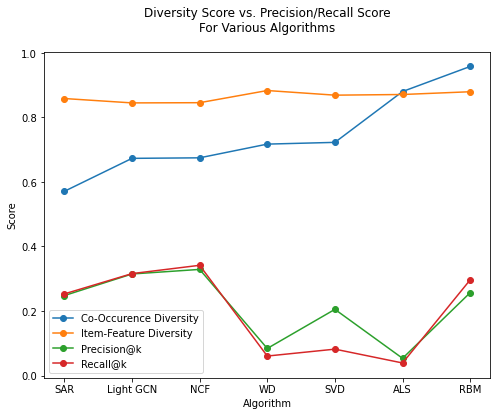

In [48]:
fig, ax = plt.subplots()

ax.plot(algos, co_occ,'-o', label="Co-Occurence Diversity")
ax.plot(algos, feature_item, '-o',label="Item-Feature Diversity")
ax.plot(algos, precision, '-o',label="Precision@k")
ax.plot(algos, recall, '-o',label="Recall@k")
ax.legend()

plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Diversity Score vs. Precision/Recall Score\nFor Various Algorithms", pad=20)
fig.set_size_inches(8, 6)
plt.savefig('results_lineplot.png')
plt.show()

<Figure size 432x288 with 0 Axes>

In [36]:
algorithm_guidance = pd.DataFrame()

In [39]:
acros = ['SAR', 'Light GCN', 'NCF', 'WD','SVD', 'ALS', 'RBM']
explanation = [
    'Simple Algorithm for Recommendation (SAR) algorithm using a Python single-node implementation.',
    'Simple, linear and neat Graph Convolution Network (GCN) model for recommendation',
    'Neural Collaborative Filtering (NCF)',
    'Wide-and-deep (WD) learning jointly trains wide linear model and deep neural networks',
    'Singular Value Decomposition (SVD) using the Surprise library',
    'Alternating Least Squares (ALS) matrix factorization',
    'Restricted Boltzmann Machine (RBM), a generative neural network'
]

In [40]:
algorithm_guidance['Acronym'] = acros
algorithm_guidance['Meaning'] = explanation
algorithm_guidance

,Acronym,Meaning
0,SAR,Simple Algorithm for Recommendation (SAR) algo...
1,Light GCN,"Simple, linear and neat Graph Convolution Netw..."
2,NCF,Neural Collaborative Filtering (NCF)
3,WD,Wide-and-deep (WD) learning jointly trains wid...
4,SVD,Singular Value Decomposition (SVD) using the S...
5,ALS,Alternating Least Squares (ALS) matrix factori...
6,RBM,"Restricted Boltzmann Machine (RBM), a generati..."


In [41]:
algorithm_guidance.to_csv("algorithm_acronym_meanings.csv", index = False)